# Sea Level Predictor

### 1. Use Pandas to import the data from epa-sea-level.csv.

In [3]:
import pandas as pd

# Import the data
df = pd.read_csv('/Users/iamshashidharbalachandragmail.com/Downloads/Learning/Python/epa-sea-level.csv')

In [4]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


### 2. Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis.

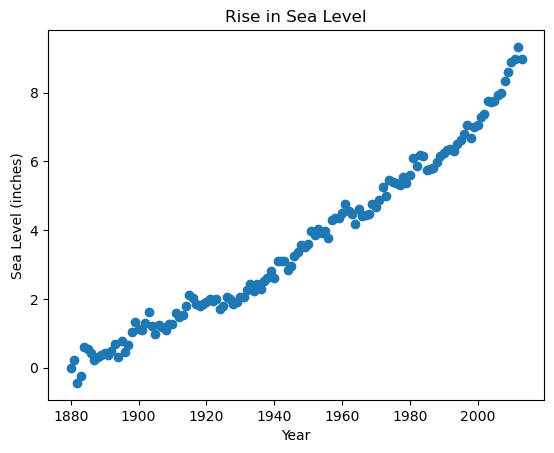

In [6]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')

plt.show()

### 3. Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

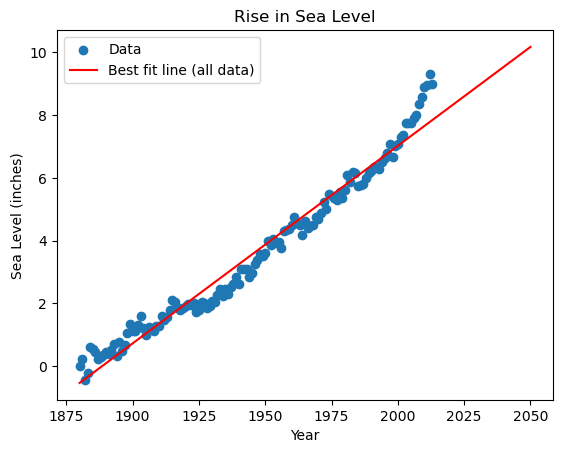

In [8]:
from scipy.stats import linregress
import numpy as np

# Perform linear regression on all data
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])

# Create years up to 2050
years_extended = np.arange(df['Year'].min(), 2051)

# Line of best fit for all data
line_best_fit = intercept + slope * years_extended

# Plot the scatter and line of best fit
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label='Data')
plt.plot(years_extended, line_best_fit, color='red', label='Best fit line (all data)')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.legend()

plt.show()

### 4. Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000. The x label should be Year, the y label should be Sea Level (inches), and the title should be Rise in Sea Level.

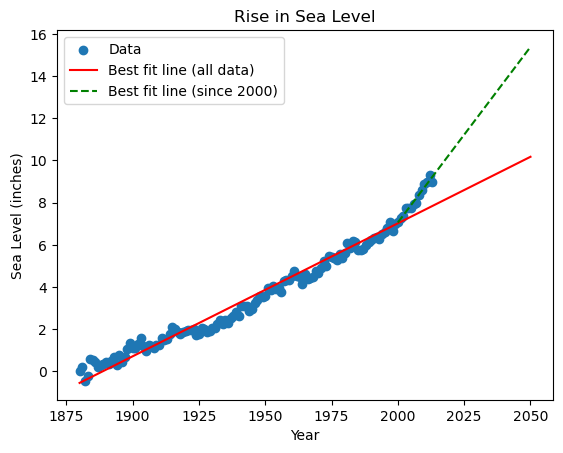

In [10]:
# Filter data from year 2000 onwards
df_2000 = df[df['Year'] >= 2000]

# Perform linear regression on data from 2000
slope_2000, intercept_2000, r_value_2000, p_value_2000, std_err_2000 = linregress(df_2000['Year'], df_2000['CSIRO Adjusted Sea Level'])

# Create years from 2000 to 2050
years_extended_2000 = np.arange(2000, 2051)

# Line of best fit for data from 2000 onwards
line_best_fit_2000 = intercept_2000 + slope_2000 * years_extended_2000

# Plot the scatter, full data line, and 2000-onwards line
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label='Data')
plt.plot(years_extended, line_best_fit, color='red', label='Best fit line (all data)')
plt.plot(years_extended_2000, line_best_fit_2000, color='green', label='Best fit line (since 2000)', linestyle='--')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.legend()

plt.show()